# Project - Predication of bike rental count on daily based on the environmental and seasonal settings

Task: The dataset contains the daily based rental bike demand data. The goal is to develop a model to estimate the bike demand in future given the parameters as observed in the past.

We will be following this example step-by-step in this Project:

1-Importing the libraries

2-Defining some utility functions

3-Loading the data

4-Cleaning the data

5-Adding derived features

6-Analyzing the dataset

7-Dividing the dataset into training and test dataset

8-Training several models and analyzing their performance

9-Selecting a model and evaluating using test dataset

# Importing the libraries

In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
from random import randrange,uniform
from sklearn.metrics import r2_score
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


# Some utility functions

In [2]:
def set_day(df):
    '''
    This function assigns day names to each of the
    rows in the dataset. 
    '''
    ## Assumes the first day of the dataset is Saturday
    days = ["Sat", "Sun", "Mon", "Tue", "Wed", "Thr", "Fri"]
    temp = ['d']*df.shape[0]
    i = 0
    indx = 0
    cur_day = df.weekday[0]
    for day in df.weekday:
        temp[indx] = days[(day-cur_day+7)%7]
        indx += 1
    df['dayWeek'] = temp
    return df

# Function that takes in a dataframe with yr and mnth attribute and calculates an array denoting the month number from the start
def mnth_cnt(df):
    '''
    Compute the count of months from the start of
    the time series.
    '''
    import itertools
    yr = df['yr'].tolist()
    mnth = df['mnth'].tolist()
    out = [0] * df.shape[0]
    indx = 0
    for x, y in zip(mnth, yr):
        out[indx] = x + 12 * y
        indx += 1
    return out

# Loading the data

The dataset can be loaded from a csv which is present on the drive at the location: (Location: C:/Users/prashant/OneDrive/Desktop/Edwisor/Projects/Project1 (Bike Rental-Jitendra))

The dataset contains the following parameters:

 instant: Record index

 dteday: Date

 season: Season (1:springer, 2:summer, 3:fall, 4:winter)

 yr: Year (0: 2011, 1:2012)

 mnth: Month (1 to 12)

 hr: Hour (0 to 23)

 holiday: weather day is holiday or not (extracted fromHoliday Schedule)

 weekday: Day of the week

 workingday: If day is neither weekend nor holiday is 1, otherwise is 0.

 weathersit: (extracted fromFreemeteo)

        1: Clear, Few clouds, Partly cloudy, Partly cloudy

        2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

        3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scatteredclouds

        4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
 temp: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min),t_min=-8, t_max=+39 (only in hourly scale)

 atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_maxt_min), t_min=-16, t_max=+50 (only in hourly scale)

 hum: Normalized humidity. The values are divided to 100 (max)

 windspeed: Normalized wind speed. The values are divided to 67 (max) casual: count of casual users

 registered: count of registered users

 cnt: count of total rental bikes including both casual and registered

In [3]:
# Working directory
os.chdir("C:/Users/prashant/OneDrive/Desktop/Edwisor/Projects/Project1 (Bike Rental-Jitendra)")

In [4]:
os.getcwd()

'C:\\Users\\prashant\\OneDrive\\Desktop\\Edwisor\\Projects\\Project1 (Bike Rental-Jitendra)'

In [5]:
#Importing Data

dir = 'C:\\Users\\prashant\\OneDrive\\Desktop\\Edwisor\\Projects\\Project1 (Bike Rental-Jitendra)'
df = pd.read_csv(os.path.join(dir, 'day.csv'))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [6]:
# Load Data
bikesData = pd.read_csv("day.csv")

In [7]:
bikesData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
#Type of DataFrame
print(type(bikesData))

<class 'pandas.core.frame.DataFrame'>


In [9]:
#Varaibles
print(bikesData.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [10]:
print(bikesData.shape)

(731, 16)


In [11]:
# Index range
print(bikesData.index)

RangeIndex(start=0, stop=731, step=1)


In [12]:
#columns
print("Columns", bikesData.columns)

Columns Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [13]:
#unique values in dataset
bikesData.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [14]:
#As we observe,some of the attributes are not required as per the requirement.
# So we can dropped :['instant','casual','registered','dteday']. 
columnsToDrop = ['instant','casual','registered','dteday']

print(bikesData.shape)

(731, 16)


In [15]:
numeric_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

categorical_var = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Analyzing the dataset

In [16]:
# dataset with null value
bikesData.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No missing value found

# Outlier Analysis

temp


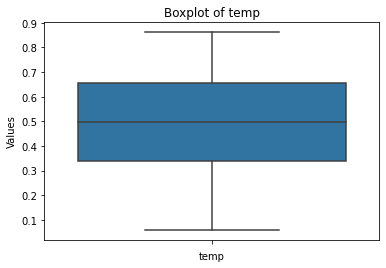

atemp


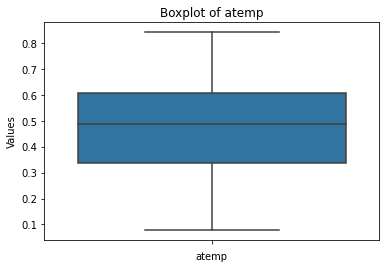

hum


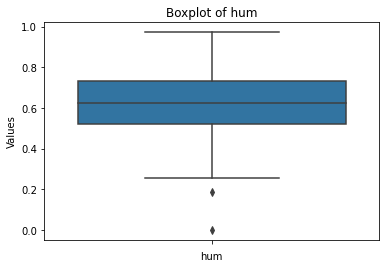

windspeed


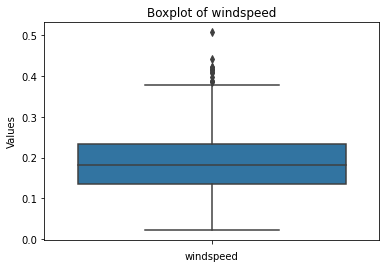

cnt


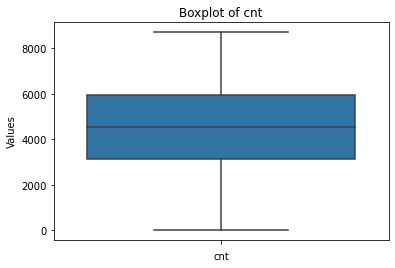

In [17]:
for i in numeric_var:
    print(i)
    sns.boxplot(y = bikesData[i])
    plt.xlabel(i)
    plt.ylabel("Values")
    plt.title("Boxplot of " + i)
    plt.show()

outliers are in windspeed and humidity.

In [18]:
for i in numeric_var:
    print(i)
    q75, q25 = np.percentile(bikesData.loc[:,i], [75, 25])
    iqr = q75 - q25
    Innerfence = q25 - (iqr*1.5)
    Upperfence = q75 + (iqr*1.5)
    print("Innerfence= "+str(Innerfence))
    print("Upperfence= "+str(Upperfence)) 
    print("IQR ="+str(iqr))

temp
Innerfence= -0.14041600000000015
Upperfence= 1.1329160000000003
IQR =0.3183330000000001
atemp
Innerfence= -0.06829675000000018
Upperfence= 1.0147412500000002
IQR =0.2707595000000001
hum
Innerfence= 0.20468725
Upperfence= 1.0455212500000002
IQR =0.21020850000000002
windspeed
Innerfence= -0.012446750000000034
Upperfence= 0.38061125
IQR =0.0982645
cnt
Innerfence= -1054.0
Upperfence= 10162.0
IQR =2804.0


In [19]:
bikesData.loc[bikesData[i]<Innerfence, i] = np.nan
bikesData.loc[bikesData[i]>Upperfence, i] = np.nan

In [20]:
# Dropping original date column
train=bikesData.drop(['dteday','instant','casual','registered','dteday'], axis=1)

# FEATURE SELECTION

In [21]:
# Correlation Analysis and Anova test # we have correlation value in  between temp ,atemp, hum, windspeed, cnt
bikesData_cor = bikesData.loc[:, numeric_var]
correlation_result = bikesData_cor.corr()
print(correlation_result)

               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991702  0.126963  -0.157944  0.627494
atemp      0.991702  1.000000  0.139988  -0.183643  0.631066
hum        0.126963  0.139988  1.000000  -0.248489 -0.100659
windspeed -0.157944 -0.183643 -0.248489   1.000000 -0.234545
cnt        0.627494  0.631066 -0.100659  -0.234545  1.000000


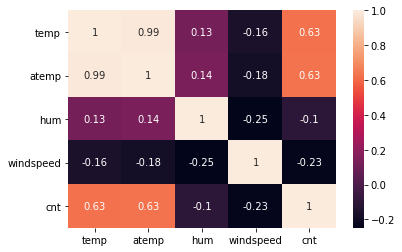

In [22]:
heatmap = sns.heatmap(correlation_result, annot=True)

Values which are close to 1 are highly correlated, so temp & atemp are highly correlated with each other

In [23]:
# Anova Test

import statsmodels.api as sm
from statsmodels.formula.api import ols

for i in categorical_var:
    mod = ols('cnt' + '~' + i, data = bikesData).fit()
    anova_table = sm.stats.anova_lm(mod, typ = 2)
    print(anova_table)

                sum_sq     df           F        PR(>F)
season    4.517974e+08    1.0  143.967653  2.133997e-30
Residual  2.287738e+09  729.0         NaN           NaN
                sum_sq     df           F        PR(>F)
yr        8.798289e+08    1.0  344.890586  2.483540e-63
Residual  1.859706e+09  729.0         NaN           NaN
                sum_sq     df          F        PR(>F)
mnth      2.147445e+08    1.0  62.004625  1.243112e-14
Residual  2.524791e+09  729.0        NaN           NaN
                sum_sq     df         F    PR(>F)
holiday   1.279749e+07    1.0  3.421441  0.064759
Residual  2.726738e+09  729.0       NaN       NaN
                sum_sq     df         F    PR(>F)
weekday   1.246109e+07    1.0  3.331091  0.068391
Residual  2.727074e+09  729.0       NaN       NaN
                  sum_sq     df         F    PR(>F)
workingday  1.024604e+07    1.0  2.736742  0.098495
Residual    2.729289e+09  729.0       NaN       NaN
                  sum_sq     df          F 

# Categorical Plots

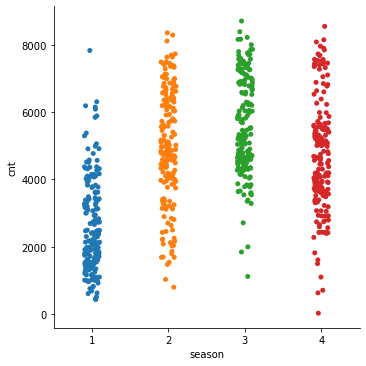

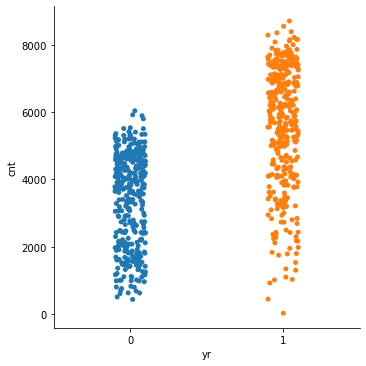

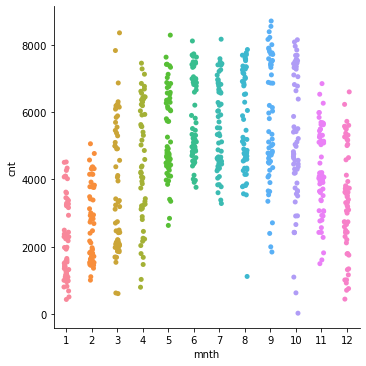

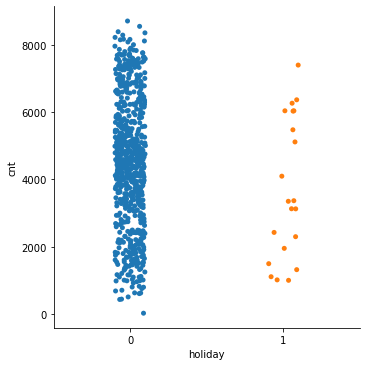

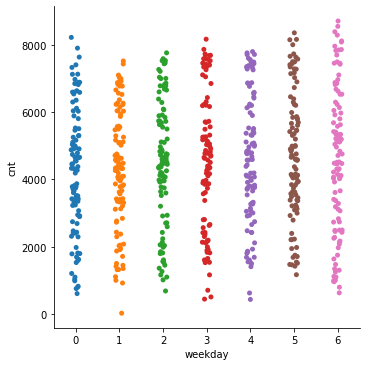

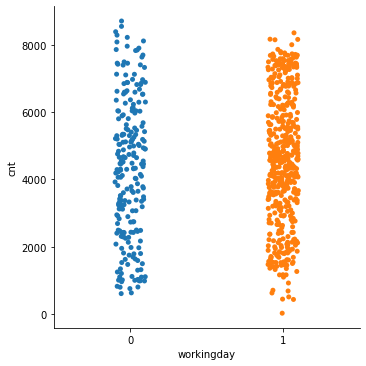

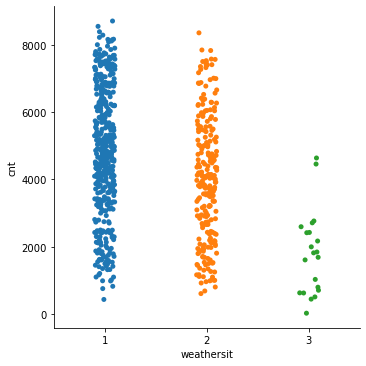

In [24]:
for i in categorical_var:
    sns.catplot(x = i, y = "cnt", data=bikesData)

Results we got -

We have highest count in Season 2, 3 and 4

we have high count in year 1

we have good count in month 3-10

we have high count in holidays than non holidays

we have highest count in weekdays 0-6

we have highest count in workingday 1

we have highest count in weather 1

In [25]:
#Removing variables atemp beacuse it is highly correlated with temp,
train=bikesData.drop(['atemp'], axis=1)

# Modeling & Model Evaluation

In [26]:
X = bikesData[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed']]
y = bikesData[['cnt']]

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(584, 10) (147, 10) (584, 1) (147, 1)


## Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train, y_train)
ylin_pred = lin.predict(X_test)

In [29]:
from sklearn import metrics

print("Mean absolute error:",metrics.mean_absolute_error(y_test, ylin_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test, ylin_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, ylin_pred)))
print("R2 score:{:0.2f}".format(metrics.r2_score(y_test, ylin_pred)*100),"%")

Mean absolute error: 569.74077815677
Mean Squared Error: 648801.3757133388
Root Mean Squared Error: 805.4820765934763
R2 score:82.44 %


## Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
import random
random.seed(1)
classifier = RandomForestRegressor(n_estimators = 50)
classifier.fit(X_train, y_train.values.ravel())
yRand_pred = classifier.predict(X_test)

In [31]:
print('Mean absolute error:',metrics.mean_absolute_error(y_test, yRand_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, yRand_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yRand_pred)))
print("R2 score:{:0.2f}".format(metrics.r2_score(y_test, yRand_pred)*100),"%")

Mean absolute error: 418.0491156462585
Mean Squared Error: 379655.73056054424
Root Mean Squared Error: 616.1620976338485
R2 score:89.73 %


## Decision Tree

In [32]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf.fit(X_train, y_train)
yDec_pred = clf.predict(X_test)

In [33]:
print('Mean absolute error:',metrics.mean_absolute_error(y_test, yDec_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, yDec_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yDec_pred)))
print('R2 score:{:0.2f}'.format(metrics.r2_score(y_test, yDec_pred)*100),"%")

Mean absolute error: 518.0952380952381
Mean Squared Error: 557543.2380952381
Root Mean Squared Error: 746.6881799621834
R2 score:84.91 %


In [34]:
#Conclusion
##Model has been developed and result calculated.